# Test 1 Rgate = 10 ohm 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("2025-11-17_08-49-02-603.csv")
df.head()

,CH1,CH2,CH3,CH4,time,Ts
0,3.019687,-0.340156,-0.360000,-0.700000,0.000000e+00,2.000000e-09
1,3.039687,-0.380000,-0.320000,-0.399219,2.000000e-09,NaN
2,3.060000,-0.400000,-0.362500,-0.400000,4.000000e-09,NaN
3,3.020938,-0.400000,-0.480000,-0.600000,6.000000e-09,NaN
4,2.959844,-0.460000,-0.406562,-0.700781,8.000000e-09,NaN


In [3]:
Ts = df.Ts.values[0]

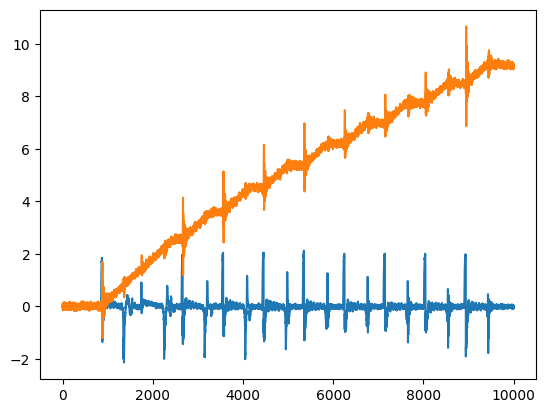

In [4]:
vds = df.CH1.values*100 # x100 probe
il =  df.CH3.values # x100 probe
il = il -il[:500].mean()
diD =  df.CH2.values # x100 probe
diD = diD -diD[:500].mean()

vgs = df.CH4.values
vgs = vgs-vgs[:500].mean()


plt.plot(diD)
plt.plot(il)
#plt.ylim([-2,15])

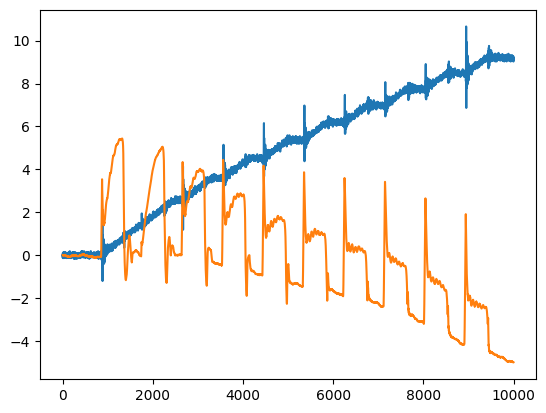

In [5]:
k= 6e7 
iD = k*np.cumsum(diD)*Ts
plt.plot(il)
plt.plot(iD)

In [6]:
from copy import copy 
iDsave = copy(iD)

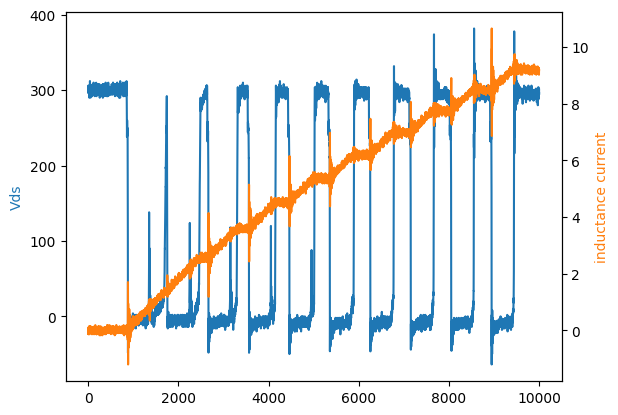

In [7]:

fig, ax1 = plt.subplots()

# Primary y-axis
ax1.plot(vds, color='C0')
ax1.set_ylabel("Vds", color='C0')

# Secondary y-axis
ax2 = ax1.twinx()
ax2.plot(il, color='C1')
ax2.set_ylabel("inductance current", color='C1')

plt.show()


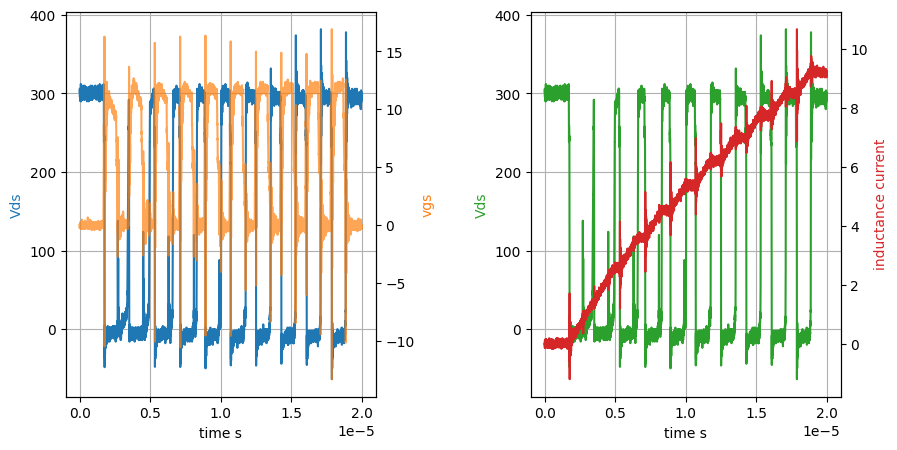

In [8]:

fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
ax1=axs[0]
t= np.arange(0,len(vds)*Ts, Ts)

# Primary y-axis
ax1.plot(t, vds, color='C0')
ax1.set_ylabel("Vds", color='C0')

# Secondary y-axis
ax2 = ax1.twinx()
ax2.plot(t, vgs, color='C1', alpha = 0.7)
ax2.set_ylabel("vgs", color='C1')





ax3=axs[1]

# Primary y-axis
ax3.plot(t, vds, color='C2')
ax3.set_ylabel("Vds", color='C2')

# Secondary y-axis
ax4 = ax3.twinx()
ax4.plot(t, il, color='C3')
ax4.set_ylabel("inductance current", color='C3')

axs[1].set_xlabel("time s")
axs[0].set_xlabel("time s")
axs[1].grid()
axs[0].grid()


plt.show()


In [9]:
# 2025-11-17_09-06-53-402.csv

# Test 2 Rgate = 3 ohm 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv("2025-11-17_09-06-53-402.csv")
df.head()

,CH1,CH2,CH3,CH4,time,Ts
0,2.980625,-0.378594,-0.400313,-0.800000,0.000000e+00,2.000000e-09
1,2.920000,-0.320469,-0.280625,-0.598438,2.000000e-09,NaN
2,2.979375,-0.400938,-0.240313,-0.398438,4.000000e-09,NaN
3,2.979219,-0.420000,-0.357500,-0.799219,6.000000e-09,NaN
4,3.060469,-0.359687,-0.401250,-0.496875,8.000000e-09,NaN


In [12]:
Ts = df.Ts.values[0]

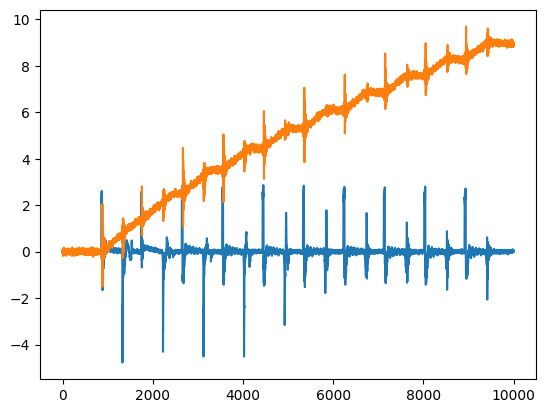

In [13]:
vds = df.CH1.values*100 # x100 probe
il =  df.CH3.values # x100 probe
il = il -il[:500].mean()
diD =  df.CH2.values # x100 probe
diD = diD -diD[:500].mean()

vgs = df.CH4.values
vgs = vgs-vgs[:500].mean()


plt.plot(diD)
plt.plot(il)
#plt.ylim([-2,15])

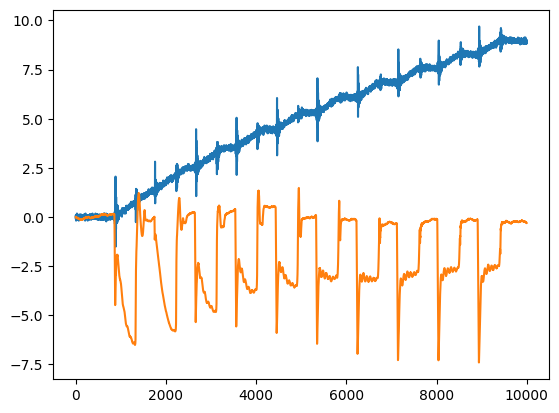

In [14]:
k= 6e7 
iD = k*np.cumsum(diD)*Ts
plt.plot(il)
plt.plot(-iD)

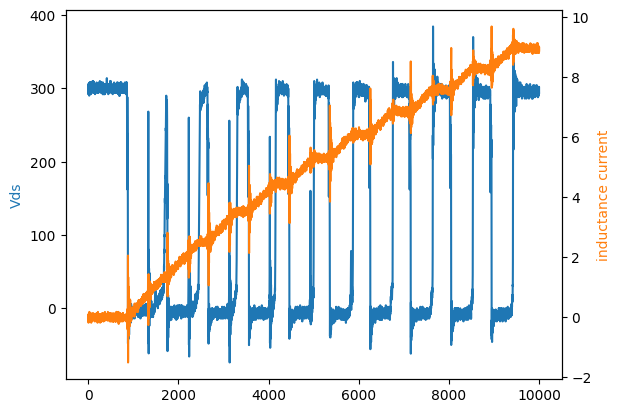

In [15]:

fig, ax1 = plt.subplots()

# Primary y-axis
ax1.plot(vds, color='C0')
ax1.set_ylabel("Vds", color='C0')

# Secondary y-axis
ax2 = ax1.twinx()
ax2.plot(il, color='C1')
ax2.set_ylabel("inductance current", color='C1')

plt.show()


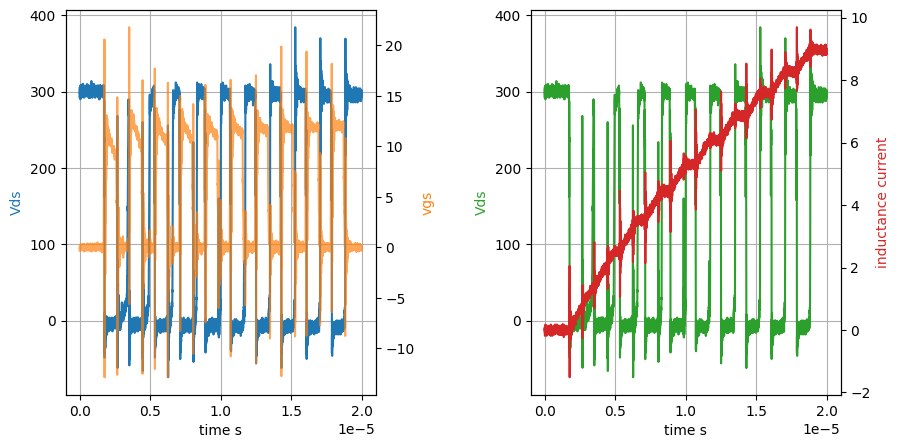

In [16]:

fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
ax1=axs[0]
t= np.arange(0,len(vds)*Ts, Ts)

# Primary y-axis
ax1.plot(t, vds, color='C0')
ax1.set_ylabel("Vds", color='C0')

# Secondary y-axis
ax2 = ax1.twinx()
ax2.plot(t, vgs, color='C1', alpha = 0.7)
ax2.set_ylabel("vgs", color='C1')





ax3=axs[1]

# Primary y-axis
ax3.plot(t, vds, color='C2')
ax3.set_ylabel("Vds", color='C2')

# Secondary y-axis
ax4 = ax3.twinx()
ax4.plot(t, il, color='C3')
ax4.set_ylabel("inductance current", color='C3')

axs[1].set_xlabel("time s")
axs[0].set_xlabel("time s")
axs[1].grid()
axs[0].grid()


plt.show()


# Rogowsky accuracy 

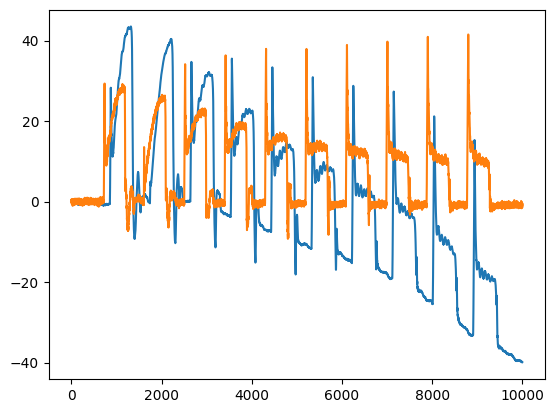

In [17]:
k= 8

id_rog = iDsave*k
plt.plot(id_rog  )
idtk = pd.read_csv("2025-11-17_09-30-47-008.csv").CH3.values
idtk = idtk-idtk[:200].mean()
plt.plot(idtk)

In [18]:
Ts= pd.read_csv("2025-11-17_09-30-47-008.csv").Ts.iloc[0]

860 722


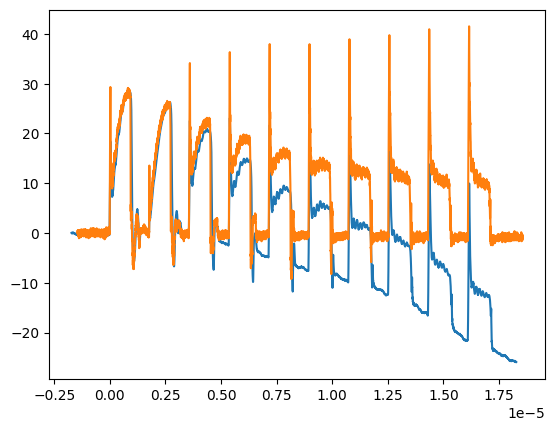

In [19]:
# trigger
k2 = 0.65
trishold = 5
it1= np.where(id_rog >trishold)[0][0]

it2= np.where(idtk >trishold)[0][0]
print(it1, it2)
t=np.arange(0,len(id_rog)*Ts, Ts)
t1= t-t[it1]
t2= t-t[it2]

id_rog2 = k2*id_rog 
plt.plot(t1, id_rog2 )
plt.plot(t2, idtk)

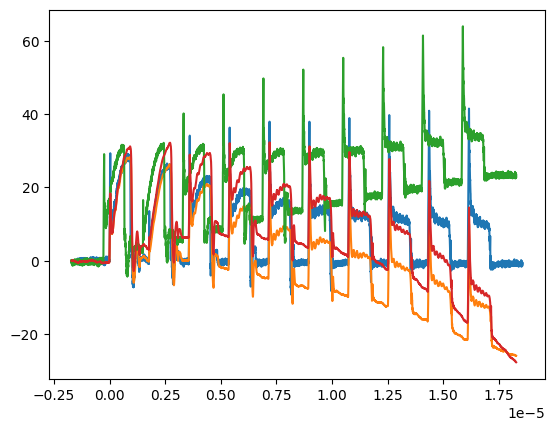

In [20]:
import numpy as np

def invert_highpass_simple(y, Ts, fcutoff):
    # First-order RC high-pass parameters
    RC = 1.0 / (2*np.pi*fcutoff)
    alpha = RC / (RC + Ts)

    x = np.zeros_like(y)

    for n in range(1, len(y)):
        x[n] = x[n-1] + (y[n] - alpha*y[n-1]) / alpha

    return x





idtk3= invert_highpass_simple(y=idtk, Ts=Ts, fcutoff=26e3)
plt.plot(t2, idtk)
plt.plot(t1, id_rog2 )
plt.plot(t1, idtk3 )
id_rog3= invert_highpass_simple(y= id_rog2, Ts=Ts, fcutoff=26e3)
plt.plot(t1, id_rog3 )

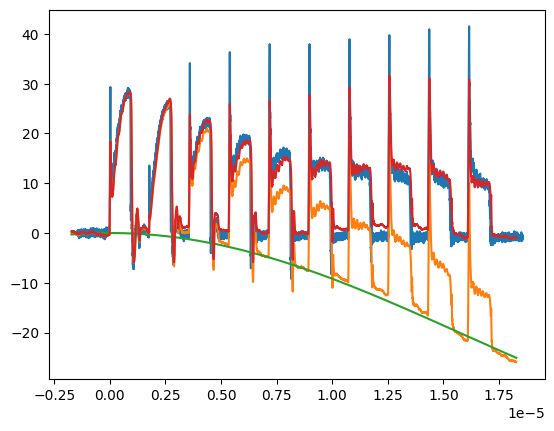

In [21]:
plt.plot(t2, idtk)
plt.plot(t1, id_rog2 )
threshold = 20*np.cos(1e5*t1) -20
plt.plot(t1, threshold)
plt.plot(t1, id_rog2-threshold)

# Remove boostrap link (cut the wire between 12V and diode)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv("2025-11-17_12-50-09-791.csv")
df.head()

,CH1,CH3,CH4,time,Ts
0,2.999844,-2.600000,-0.299219,0.000000e+00,2.000000e-09
1,3.000313,-3.003125,-0.600000,2.000000e-09,NaN
2,3.080000,-2.800000,-0.300000,4.000000e-09,NaN
3,2.999531,-2.801563,-0.600000,6.000000e-09,NaN
4,2.980000,-2.223438,-0.307812,8.000000e-09,NaN


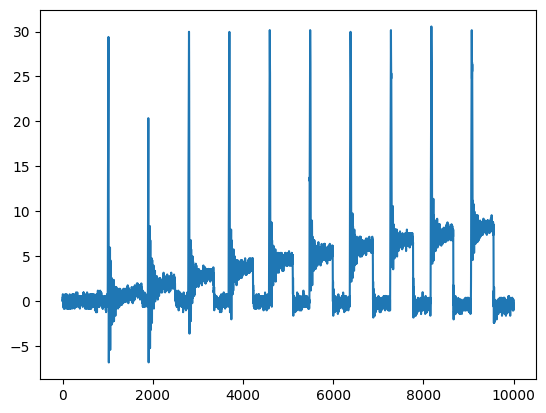

In [10]:
Ts = df.Ts.values[0]
vds = df.CH1.values*100 # x100 probe
iD =  df.CH3.values # x100 probe
iD = iD -iD[:500].mean()
#diD =  df.CH2.values # x100 probe
#diD = diD -diD[:500].mean()

vgs = df.CH4.values
vgs = vgs-vgs[:500].mean()


#plt.plot(diD)
plt.plot(iD)
#plt.ylim([-2,15])

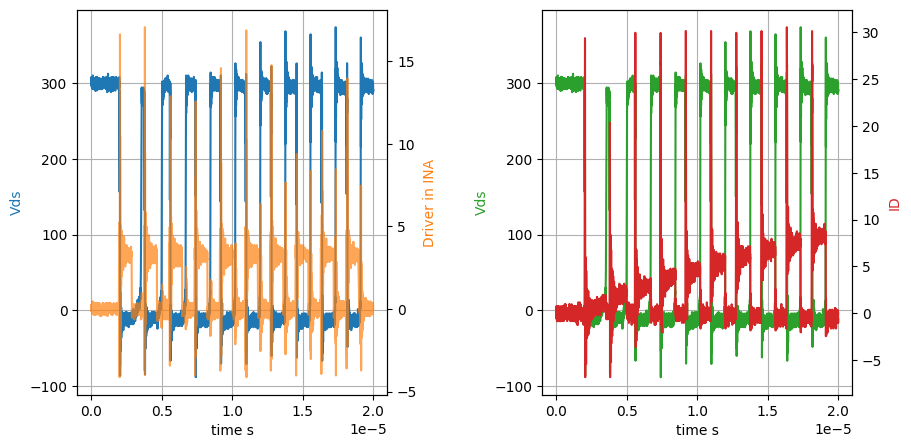

In [11]:

fig, axs = plt.subplots(1,2, figsize=(10,5)
, gridspec_kw={'wspace':0.5#, 'hspace': 1.0
              })
ax1=axs[0]
t= np.arange(0,len(vds)*Ts, Ts)

# Primary y-axis
ax1.plot(t, vds, color='C0')
ax1.set_ylabel("Vds", color='C0')

# Secondary y-axis
ax2 = ax1.twinx()
ax2.plot(t, vgs, color='C1', alpha = 0.7)
ax2.set_ylabel("Driver in INA", color='C1')





ax3=axs[1]

# Primary y-axis
ax3.plot(t, vds, color='C2')
ax3.set_ylabel("Vds", color='C2')

# Secondary y-axis
ax4 = ax3.twinx()
ax4.plot(t, iD, color='C3')
ax4.set_ylabel("ID", color='C3')

axs[1].set_xlabel("time s")
axs[0].set_xlabel("time s")
axs[1].grid()
axs[0].grid()


plt.show()


In [7]:
c= 1e-6
R= 10
rc=R*c
3*rc

2.9999999999999997e-05

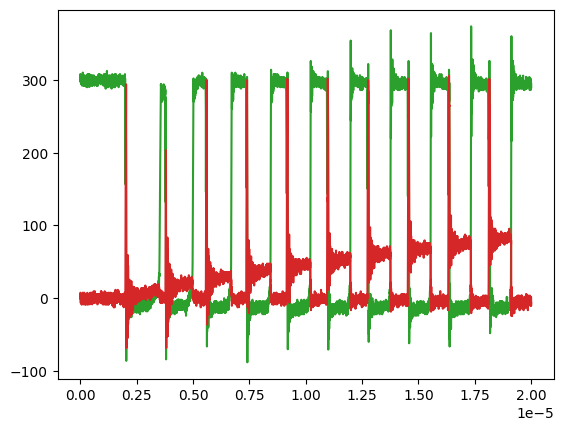

In [15]:
# Primary y-axis
plt.plot(t, vds, color='C2')

plt.plot(t, 10*iD, color='C3')


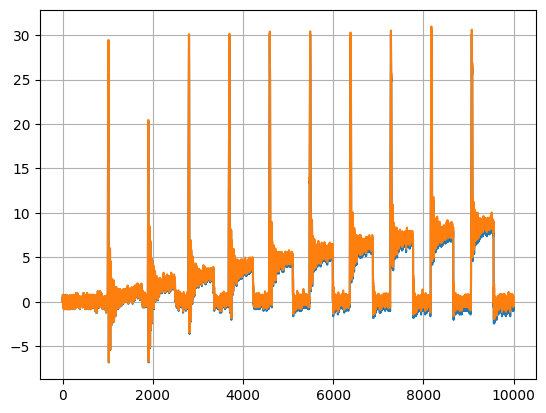

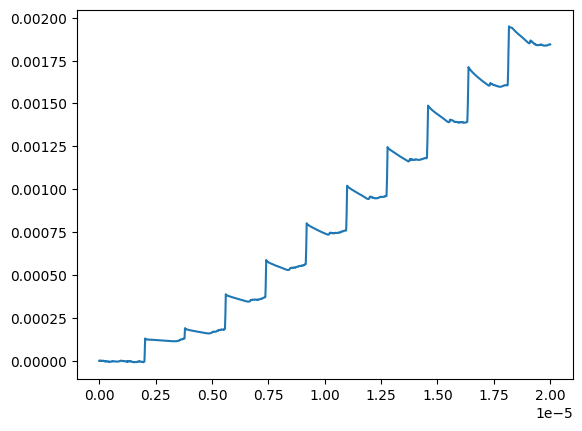

In [44]:
plt.plot(iD)
k= 5e-5
iD2= iD + np.arange(0,len(iD))*k
plt.plot(iD2)
plt.grid()
plt.show()
# Primary y-axis
p = vds*iD2
p = p-p[:500].mean()
E =np.cumsum(p)*Ts
#plt.plot(t, p, color='C2')
#plt.show()
plt.plot(t, E)


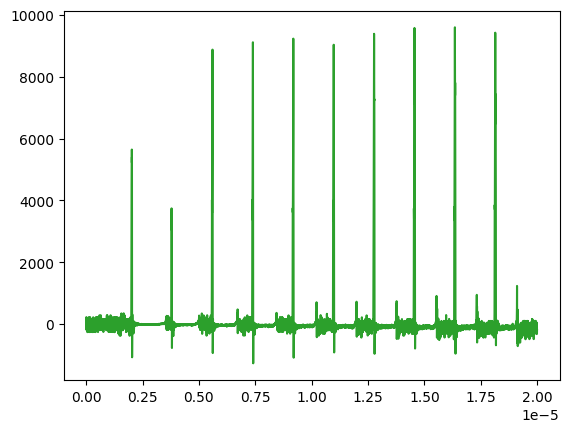

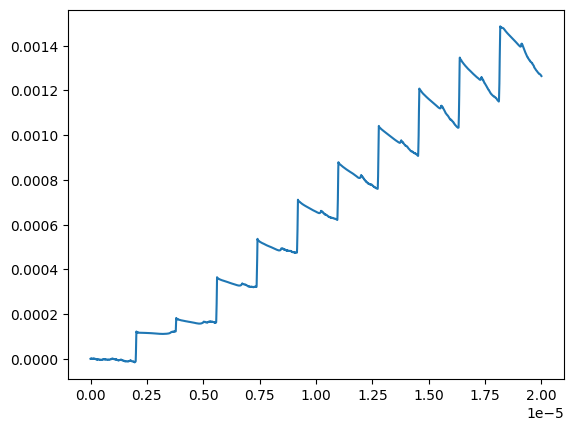

In [45]:
#### Primary y-axis
p = vds*iD
p = p-p[:500].mean()
E =np.cumsum(p)*Ts
plt.plot(t, p, color='C2')
plt.show()
plt.plot(t, E)




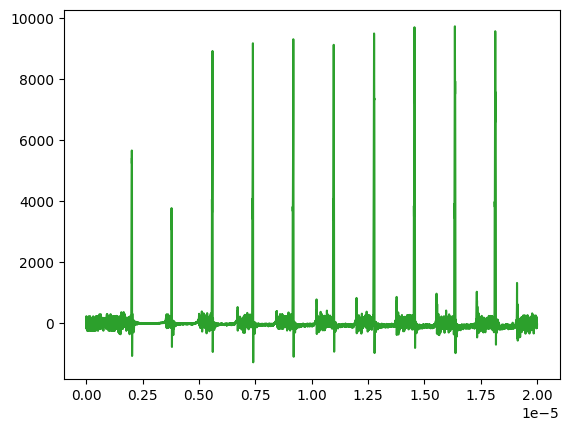

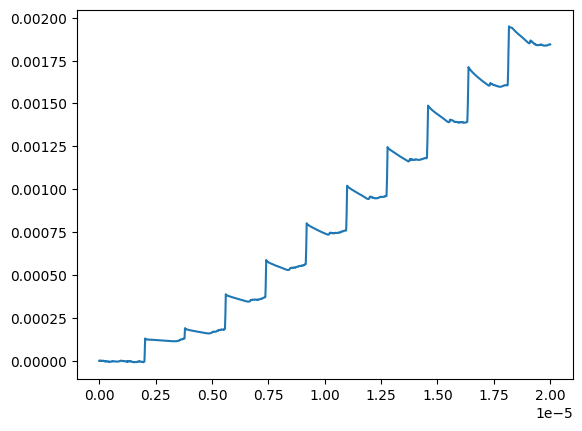

In [46]:
# Primary y-axis
p = vds*iD2
p = p-p[:500].mean()
E =np.cumsum(p)*Ts
plt.plot(t, p, color='C2')
plt.show()
plt.plot(t, E)




16


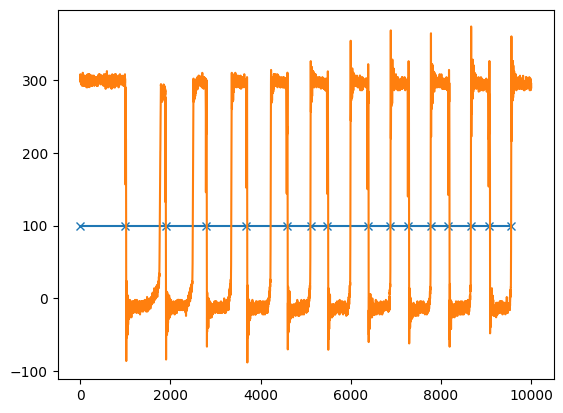

In [57]:
from math import *
arg=[0]
for i in range(1, len(vds)):
    if (vds[i]-vds[i-1])>50:
        if i-arg[-1]>100:
            arg.append(i) 
print(len(arg))
plt.plot(arg, len(arg)*[100], marker="x")
plt.plot(vds)

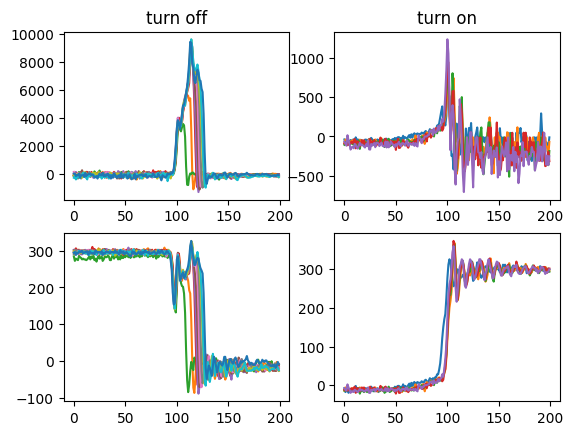

In [84]:
fig , axs= plt.subplots(2,2)
di=100
Eon={}
Eoff={}
for i in arg:
    I1 = iD[i+10:i+di*2+10].mean()
    I2 = iD[i-di*2-10:i-10].mean()
    if I2> I1:
        I1= I2
    
        
    p=vds[i-di:i+di]*iD[i-di:i+di]


    E= np.sum(p)*Ts*1e6
    if vds[i-di] > vds[i+di]: # turn off
        axs[0][0].plot(p)
        axs[1][0].plot(vds[i-di:i+di])
        axs[0][0].set_title("turn off")
        Eoff[I1]=E
    else : # turn on
        axs[0][1].plot(p)
        axs[1][1].plot(vds[i-di:i+di])
        axs[0][1].set_title("turn on")
        Eon[I1]=E

    
    
    

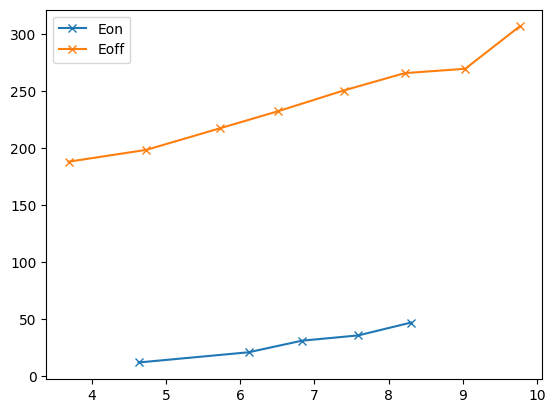

In [102]:
(-pd.Series(Eon)).plot(label = "Eon",marker="x")
s=pd.Series(Eoff)
s=s[s.index>3]
s.plot(label = "Eoff",marker="x")
plt.legend()

# End